# Factors Affect Ford GoBike System Usages in San Francisco Bay area.

## by Chia-Hung Yen

## Investigation Overview



## Dataset Overview

This data is from lyft bikes that contains the information about the bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_18_clean = pd.read_csv('gobike_2018.csv')

## Distribution of trips for each week of the day

The relative frequency of trips taken for each week of the day is plotted by the order of Monday to Sunday. The highest frequency is 17.13% on Tuesday, and the lowest is 8.23% on Sunday. 

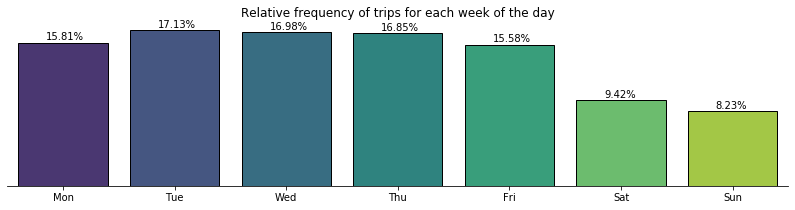

In [3]:
# plot the usage by day of the week
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
day= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig= plt.subplots(figsize = (14,3))
g = sb.countplot(data = df_18_clean, x = 'day_of_the_week' , order = day, edgecolor = "black", palette = "viridis")
plt.title('Relative frequency of trips for each week of the day')
g.set_xlabel('')
g.set_ylabel('')
g.get_yaxis().set_visible(False)
sb.despine(left = True);
for p in g.patches:
    g.annotate('{:.2f}%'.format(100*p.get_height()/len(df_18_clean)), (p.get_x()+0.25, p.get_height()+5500))


## Distribution of trips for each month

The total trip counts for each month in 2018 are plotted. We can see the increase of trip counts from May to October, which happens to be the dry season of San Franciso.


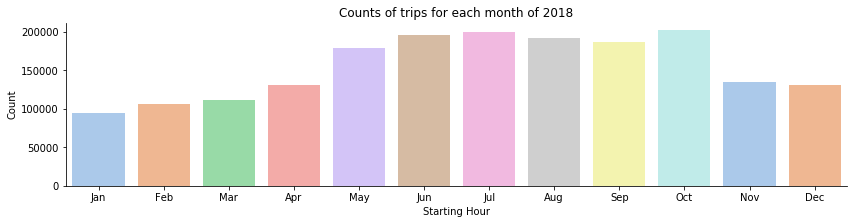

In [4]:
fig, ax = plt.subplots(figsize = (14,3))
sb.countplot(data = df_18_clean, x = 'month', palette = 'pastel', order = month );
plt.title('Counts of trips for each month of 2018')
ax.set_xlabel('Starting Hour')
ax.set_ylabel('Count')
sb.despine();

## Trip counts for each Hour vs. Type of User
The trip counts for two types of user are plotted by each hour of the day. There are dramatic increase during both rush hours(morning/evening) for subscribers. However, Only slightly increase for non subscribers in the evening. 

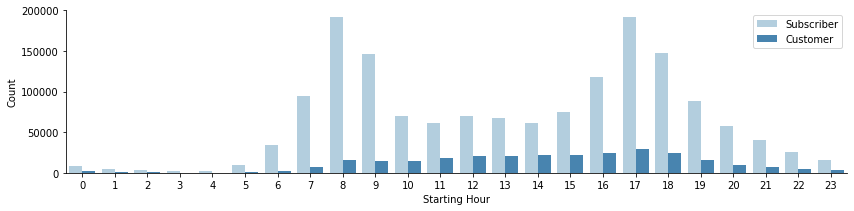

In [5]:
fig, ax = plt.subplots(figsize = (14,3))
sb.countplot(data = df_18_clean, x = 'start_hr', hue = 'user_type', palette = 'Blues')
ax.set_xlabel('Starting Hour')
ax.set_ylabel('Count')
plt.legend(title = '')
sb.despine();

## Difference of two types of user by each day of each month
From the heatmaps, we can tell that the heatmap for subscribers has a pattern that 5 days with higher trip counts then followed by 2 days with lower counts. Those don't follow this pattern are all holidays.



In [6]:
df_user_day_m = df_18_clean.groupby(['day','month','user_type'], as_index = False)['bike_id'].count()
ordinal_var_dict = {'month':month}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_user_day_m[var] = df_user_day_m[var].astype(ordered_var)
df_sub_day_m = df_user_day_m.query('user_type =="Subscriber"')
df_nsub_day_m = df_user_day_m.query('user_type !="Subscriber"')

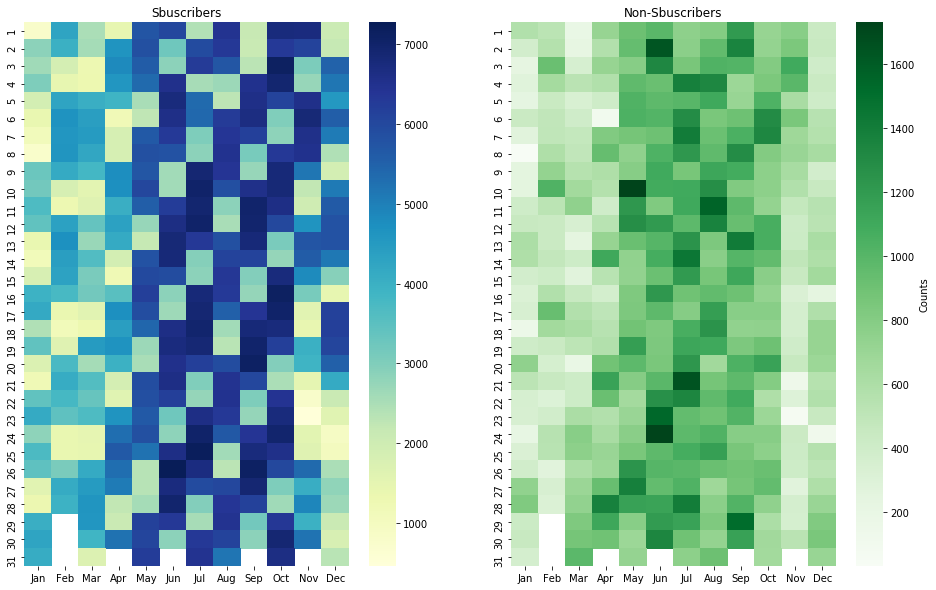

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,10])
heatmap = pd.pivot_table(df_sub_day_m, values='bike_id', index='day', columns='month' )
g = sb.heatmap(heatmap, cmap="YlGnBu", ax = ax[0])
g.set_xlabel(''), g.set_ylabel(''),g.set_title('Sbuscribers')
heatmap1 = pd.pivot_table(df_nsub_day_m, values='bike_id', index='day', columns='month')
g1=sb.heatmap(heatmap1, cmap="Greens",cbar_kws={'label': 'Counts'}, ax = ax[1] )
g1.set_xlabel(''),g1.set_ylabel(''),g1.set_title('Non-Sbuscribers');